# Importing functions from other notebooks

In [1]:
!pip install import-ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [2]:
import import_ipynb

In [3]:
runningMethod = "COLAB" #LOCAL, COLAB
#note: Restart Kernel, evertime a change is made on either notebook being imported

# running all notebooks locally
if runningMethod == "LOCAL":
  # coxeter group imports
  from CheckCoxeter_GenRandomConjugates_GinaRob import cox_gen, cox_rel, subroutine_b_cox, is_coxeter_matrix
  from GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_coxeter_word, reduce_artin_word

  # artin group imports
  from CheckCoxeter_GenRandomConjugates_GinaRob import artin_gen, artin_rel, subroutine_b_artin #no is_artin_matrix yet
  from GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_artin_word

# importing using colab mount folder
elif runningMethod == "COLAB":
  #importing notebooks
  #subroutine a (reduce obvious words)

  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

  # coxeter group imports
  from drive.MyDrive.DatasetGeneration.CheckCoxeter_GenRandomConjugates_GinaRob import cox_gen, cox_rel, subroutine_b_cox, is_coxeter_matrix
  from drive.MyDrive.DatasetGeneration.GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_coxeter_word, reduce_artin_word

  # artin group imports
  from drive.MyDrive.DatasetGeneration.CheckCoxeter_GenRandomConjugates_GinaRob import artin_gen, artin_rel, subroutine_b_artin #no is_artin_matrix yet
  from drive.MyDrive.DatasetGeneration.GenArtinCoxRelators_NonvisiblyReduced_CelinaRoman import reduce_artin_word


Mounted at /content/drive
generators: [1, 2, 3, 4]
relators: [[1, 1], [2, 2], [3, 3], [4, 4], [1, 2, 1, 2], [1, 3, 1, 3, 1, 3], [1, 4, 1, 4], [2, 3, 2, 3, 2, 3, 2, 3], [2, 4, 2, 4]]
trivial string: [1, 3, 2, 1, 2, 1, 3, 1]
generators: [-3, -2, -1, 1, 2, 3]
relators: [[1, 2, 1, -2, -1, -2], [1, 3, -3, -1], [2, 3, 2, -3, -2, -3]]
trivial string: [-2, -3, 2, 1, 2, -1, -2, -1, 3, 2]
Before reducing:  s₀s₂s₂s₄
After being reduced:  s₀s₄
Before reducing:  s₀s₂⁻¹s₂s₄
After reducing:  s₀s₄


In [5]:
#Run this preamble to import some libraries that are available in google colab that are often useful.
#Numpy is good for efficiently working with array/vector/matrix data.
#Random is good for generating random numbers according to some (discrete or continuous) distribution
#Matplotlib is good for plotting
#Torch is PyTorch, which is the standard python library for creating and training ML models
#You may need to call other libraries for your code

import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Additional
from typing import List, Tuple

# Generating a trivial word using subroutines (Coxeter and Artin)

In [6]:
# Function generating the trivial words
def wordElongater(generators, relators, N: int, mode="coxeter") -> List[int]:
  """
  goal: generate a trivial word of length N by making it longer using subroutineB then removing 'aa' relations to make it less visibly reducible
  """
  word_creation_routine = None    #subroutnie_b
  reduce_visible_routine = None   #subroutine_a

  if mode == "coxeter":
    word_creation_routine = subroutine_b_cox
    reduce_visible_routine = reduce_coxeter_word
  elif mode == "artin":
    word_creation_routine = subroutine_b_artin
    reduce_visible_routine = reduce_artin_word


  #initialize the empty word
  tWord = []

  ## Subroutine B: Elongating the word
  #run until desired size is reached (tWord will be of length: >= N)
  tWord = word_creation_routine(tWord, generators, relators)  #1st pass
  while( len(tWord) < N ):
    tWord = word_creation_routine(tWord, generators, relators)


  ## Subroutine A: removing the 'aa' visible trivial parts of a word
  #tWord=subroutineA(tWord)
  tWord = reduce_visible_routine(tWord)


  #check that it's long enough, if it is then return tWord, if not then call again
  if len(tWord) < N:
    tWord = wordElongater(generators, relators, N, mode=mode)

  return tWord


In [7]:
# Validating functions used to get generators and relators from a coxeter matrix:

coxeterMatrix = np.array([
    [1, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])

#first check if the matrix is valid:
is_coxeter_matrix(4, coxeterMatrix)

## Get Generators and Relators
cGenerators = cox_gen(coxeterMatrix)
cRelators = cox_rel(coxeterMatrix)


print(cGenerators)
print(cRelators)

This is a valid Coxeter matrix.
[1, 2, 3, 4]
[[1, 1], [2, 2], [3, 3], [4, 4], [1, 2, 1, 2, 1, 2], [1, 3, 1, 3], [1, 4, 1, 4], [2, 3, 2, 3, 2, 3], [2, 4, 2, 4], [3, 4, 3, 4, 3, 4]]


In [8]:
# Validating subroutine functions and the trivial word generator function:

N = 10
trivialWord = wordElongater(cGenerators, cRelators, N)
print(f"Our word must be greater than or equal to {N}")
print(f"Trivial Word: {trivialWord}")
print(f"Length of Word: {len(trivialWord)}")

Our word must be greater than or equal to 10
Trivial Word: [3, 2, 4, 2, 3, 1, 3, 1, 2, 4, 2, 3]
Length of Word: 12


## Debug tests

In [9]:
N = 10
trivialWord = wordElongater(cGenerators, cRelators, N)
print(f"Our word must be greater than or equal to {N}")
print(f"Trivial Word: {trivialWord}")
print(f"Length of Word: {len(trivialWord)}")

Our word must be greater than or equal to 10
Trivial Word: [3, 2, 4, 3, 1, 3, 1, 4, 2, 3]
Length of Word: 10


In [10]:
la = [1,1,1,2,2,2]
t = ['h', 'i']
#insert elm into the list
la[3:3] = t
print(la)

[1, 1, 1, 'h', 'i', 2, 2, 2]


In [11]:
a1 = [1,2,3]
a2 = [6,5,4]
a3 = a1 + a2
print(a3)

[1, 2, 3, 6, 5, 4]


# Generating Trivial Word Dataset

In [12]:
def writeDataset(generators, relators, totalWords, targetSize, mode="coxeter"):
  f = open("trivialWords.txt", mode="w")
  words = []
  for i in range(totalWords):
    word_as_list = wordElongater(generators, relators, targetSize, mode=mode)
    f.write(" ".join(str(item) for item in word_as_list) + "\n")
    words.append(word_as_list)
  return words

In [13]:
# write to a file, trivialWords.txt

totalWords = 100
coxeterMatrix = np.array([
    [1, 3, 2, 2],
    [3, 1, 3, 2],
    [2, 3, 1, 3],
    [2, 2, 3, 1]
])
#first check if the matrix is valid:
is_coxeter_matrix(4, coxeterMatrix)

## Get Generators and Relators
cGenerators = cox_gen(coxeterMatrix)
cRelators = cox_rel(coxeterMatrix)

targetSize = 16

dataset = writeDataset(cGenerators, cRelators, totalWords, targetSize, mode="coxeter")



This is a valid Coxeter matrix.


In [14]:
aGenerators = artin_gen(coxeterMatrix)
aRelators = artin_rel(coxeterMatrix)
print(aGenerators)
print(aRelators)
totalWords = 100
targetSize = 20
dataset = writeDataset(aGenerators, aRelators, totalWords, targetSize, mode="artin")

[-4, -3, -2, -1, 1, 2, 3, 4]
[[1, 2, 1, -2, -1, -2], [1, 3, -3, -1], [1, 4, -4, -1], [2, 3, 2, -3, -2, -3], [2, 4, -4, -2], [3, 4, 3, -4, -3, -4]]


# Get a distribution of trivial dataset

In [15]:
# Read in dataset from file

def readDataset(fileName:str):
  words = []
  with open(fileName) as fileObj:
    for line in fileObj:
      raw_list = line.split(" ")   #note: last gen has \n char as well
      gen_list = list(map(int, raw_list))
      lenWord = len(gen_list)
      words.append(gen_list)
  return words

# Use dataset to get a list of tuples with word length types and their frequencies

def getWordLengthFrequencies(dataset) -> List[Tuple[int,int]]:
  frequencies = {}
  for word in dataset:
    wordLen = len(word)
    if wordLen in frequencies:
      frequencies[wordLen] += 1
    else:
      frequencies[wordLen] = 1
  return frequencies

# Create a plot for the frequencies dictionary

def plotFrequencies(dataset):
  #turn dataset into list of lengths
  wordLengths = [len(word) for word in dataset]

  plt.hist(wordLengths)



[-4, -3, -2, -1, 1, 2, 3, 4]
[[1, 2, 1, -2, -1, -2], [1, 3, -3, -1], [1, 4, -4, -1], [2, 3, 2, -3, -2, -3], [2, 4, -4, -2], [3, 4, 3, -4, -3, -4]]


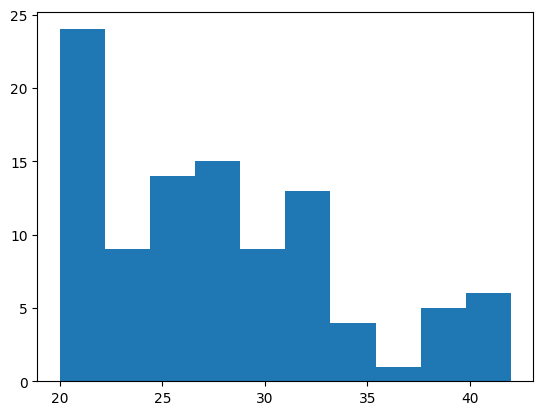

In [23]:
# Using the above functions:
aGenerators = artin_gen(coxeterMatrix)
aRelators = artin_rel(coxeterMatrix)
print(aGenerators)
print(aRelators)
totalWords = 100
targetSize = 20
words = writeDataset(aGenerators, aRelators, totalWords, targetSize, mode="artin")
#words = readDataset("trivialWords.txt")

plotFrequencies(words)

## Debugs testing dataset and freq functions

In [84]:
# Debugging code:

dataset = readDataset(fileName="trivialWords.txt")
print(f"First Word: {dataset[0]}")

frequencies = getWordLengthFrequencies(dataset)
print(f"Word Lengths: {frequencies.keys()}")

total = 0
for freq in frequencies.values():
  total += freq
print(f"Total Words: {total}")

First Word: [2, 1, 2, 1, -2, -1, -2, 3, -4, 2, 2, 1, 2, -1, -2, -1, -2, 4, -3, -2]
Word Lengths: dict_keys([20, 24, 36, 28, 22, 32, 26, 30, 34, 42, 38, 40])
Total Words: 100


# Match Trivial Dataset with a "likely" Non-Trivial dataset

In [84]:
# take a trivial dataset and set of generators to return a similarly sized non trivial dataset

def generateNonTrivialDataset(trivialDataset, generators):

  #


  # add the words to the nonTrivialWords.txt file in a random order


  pass
